In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\patri\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("output.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Customer ID,"If a customer has bounced in first EMI (1 : Bounced, 0 : Not bounced)",Number of times bounced in recent 12 months,Maximum MOB (Month of business with TVS Credit),Number of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,Geographical Location 3,Geographical Location 4,Housewife,Self-Employed,Salaried,Pensioner,Student,Residence Owned By Office,Residence Owned,Residence Rented
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
df.columns


Index(['Customer ID',
       'If a customer has bounced in first EMI (1 : Bounced, 0 : Not bounced)',
       'Number of times bounced in recent 12 months',
       'Maximum MOB (Month of business with TVS Credit)',
       'Number of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'No of advance EMI paid', 'Rate of Interest',
       'Gender(Male = 0, Female = 1)',
       'Age at which customer has taken the loan', 'Number of loans',
       ' Number of secured loans', ' Number of unsecured loans',
       'Maximum amount sanctioned in the Live loans',
       'Number of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first co

In [4]:
y = df['Target variable ( 1: Defaulters / 0: Non-Defaulters)']
df['Target variable ( 1: Defaulters / 0: Non-Defaulters)'].value_counts()

0    71904
1     1628
Name: Target variable ( 1: Defaulters / 0: Non-Defaulters), dtype: int64

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan']]

# Create a Train Test Split

Use `Target variable ( 1: Defaulters / 0: Non-Defaulters)` for the y values

In [6]:
from sklearn.model_selection import train_test_split

X = selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=30)

In [7]:
X_train.head()

,EMI,Loan Amount,Maximum amount sanctioned for any Two wheeler loan,Age at which customer has taken the loan,Rate of Interest,Number of times 30 days past due in last 6 months,Maximum MOB (Month of business with TVS Credit),Number of times 60 days past due in last 6 months,Number of loans,Maximum amount sanctioned in the Live loans,Number of times 90 days past due in last 3 months,Tenure,Number of times bounced while repaying the loan
51260,1848.0,28000.0,28000.0,35.0,12.50,0,13.0,0,10,100000.0,0,18.0,0.0
46361,2976.0,59900.0,59900.0,48.0,9.60,0,19.0,0,5,0.0,0,24.0,1.0
15980,2008.0,37500.0,37500.0,56.0,14.25,3,22.0,0,13,1000000.0,0,24.0,0.0
37059,2438.0,44900.0,44900.0,43.0,7.99,4,17.0,3,4,50000.0,0,21.0,2.0
7809,2498.0,50900.0,50900.0,42.0,8.88,0,19.0,0,7,0.0,0,24.0,1.0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data

#setup MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#set initial sizing of minmaxscaler using training data
X_scaler = MinMaxScaler().fit(X_train)

#y is just 1 or zero, so no need to scale it!
# y_scaler = MinMaxScaler().fit(y_train)

In [9]:
#use MinMaxScaler to transform the data in the training and test data sets
#so that it is not weighted improperly

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

# Train the Model



In [10]:
#uses a standard random forest for this notebook
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200, class_weight="balanced")
classifier

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [11]:
#create the model using the training data!
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [12]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9759298293329707


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def equi_loans_val(y_true, y_pred):
    valid_predictions = 0
    invalid_predictions = 0
    
    for i in range(0, len(y_pred)):
        if (y_pred[i] == 1):
            if (y_true.array[i] == 1):
                valid_predictions+=1
            else:
                invalid_predictions+=1
    
    return valid_predictions*5-invalid_predictions
    
    
my_scorer = make_scorer(equi_loans_val, greater_is_better=True)

param_grid = {'ccp_alpha': [0, 0.5, 1],
             'n_estimators': [100, 200, 300],
              'class_weight': ["balanced", {0:1, 1:5}]
             }

grid = GridSearchCV(classifier, param_grid, scoring=my_scorer)

In [23]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=200),
             param_grid={'ccp_alpha': [0, 0.5, 1],
                         'class_weight': ['balanced', {0: 1, 1: 5}],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(equi_loans_val))

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'ccp_alpha': 0, 'class_weight': 'balanced', 'n_estimators': 100}
12.4


In [25]:
#compare with the test data!
predictions = grid.predict(X_test_scaled)
print(sum(predictions), sum(y_test))

total = 0

for i in range(len(predictions)):
    if(predictions[i] == y_test.array[i]):
        total +=1 
        
print(total/len(predictions))

16 352
0.9757938396681852


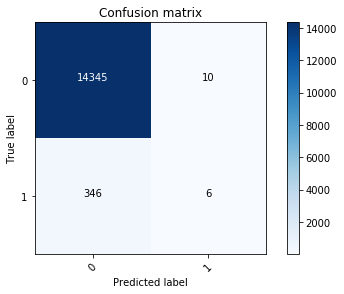

In [27]:
from confusion_matrix_plot import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


#check out the confusion matrix    
y_pred = grid.predict(X_test_scaled)
thresh = 0.08
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )

In [26]:
#check classification report for how the tuned model did!
from sklearn.metrics import classification_report

#has issues finding the default cases - did not find any correctly!
print(classification_report(y_test, predictions,
                            target_names=["Non-Default", "Default"]))

              precision    recall  f1-score   support

 Non-Default       0.98      1.00      0.99     14355
     Default       0.38      0.02      0.03       352

    accuracy                           0.98     14707
   macro avg       0.68      0.51      0.51     14707
weighted avg       0.96      0.98      0.96     14707



In [20]:
importances = classifier.feature_importances_
sorted(zip(importances, selected_features.columns), reverse=True)

[(0.12987161828354574, 'EMI'),
 (0.1099380851961239, 'Maximum amount sanctioned for any Two wheeler loan'),
 (0.10917036823743248, 'Loan Amount'),
 (0.10230464477290256, 'Rate of Interest'),
 (0.10103680879756446, 'Age at which customer has taken the loan'),
 (0.07793157956593673, 'Maximum MOB (Month of business with TVS Credit)'),
 (0.07272089733070586, 'Number of loans'),
 (0.07177779490372452, 'Number of times 30 days past due in last 6 months'),
 (0.0692155739483813, 'Maximum amount sanctioned in the Live loans'),
 (0.053372118698298346, 'Number of times 60 days past due in last 6 months'),
 (0.039485386333947006, 'Number of times bounced while repaying the loan'),
 (0.03383094347674856, 'Tenure'),
 (0.029344180454688625, 'Number of times 90 days past due in last 3 months')]

# Save the Model

In [28]:
# save your model by updating the filename to match the model

import joblib
filename = 'random_forest_model.sav'
joblib.dump(grid, filename)

['random_forest_model.sav']